<a href="https://colab.research.google.com/github/hwanys2/ai_practice/blob/main/6_3%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

PCA 도구제공

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

In [ ]:
print(pca.components_.shape)

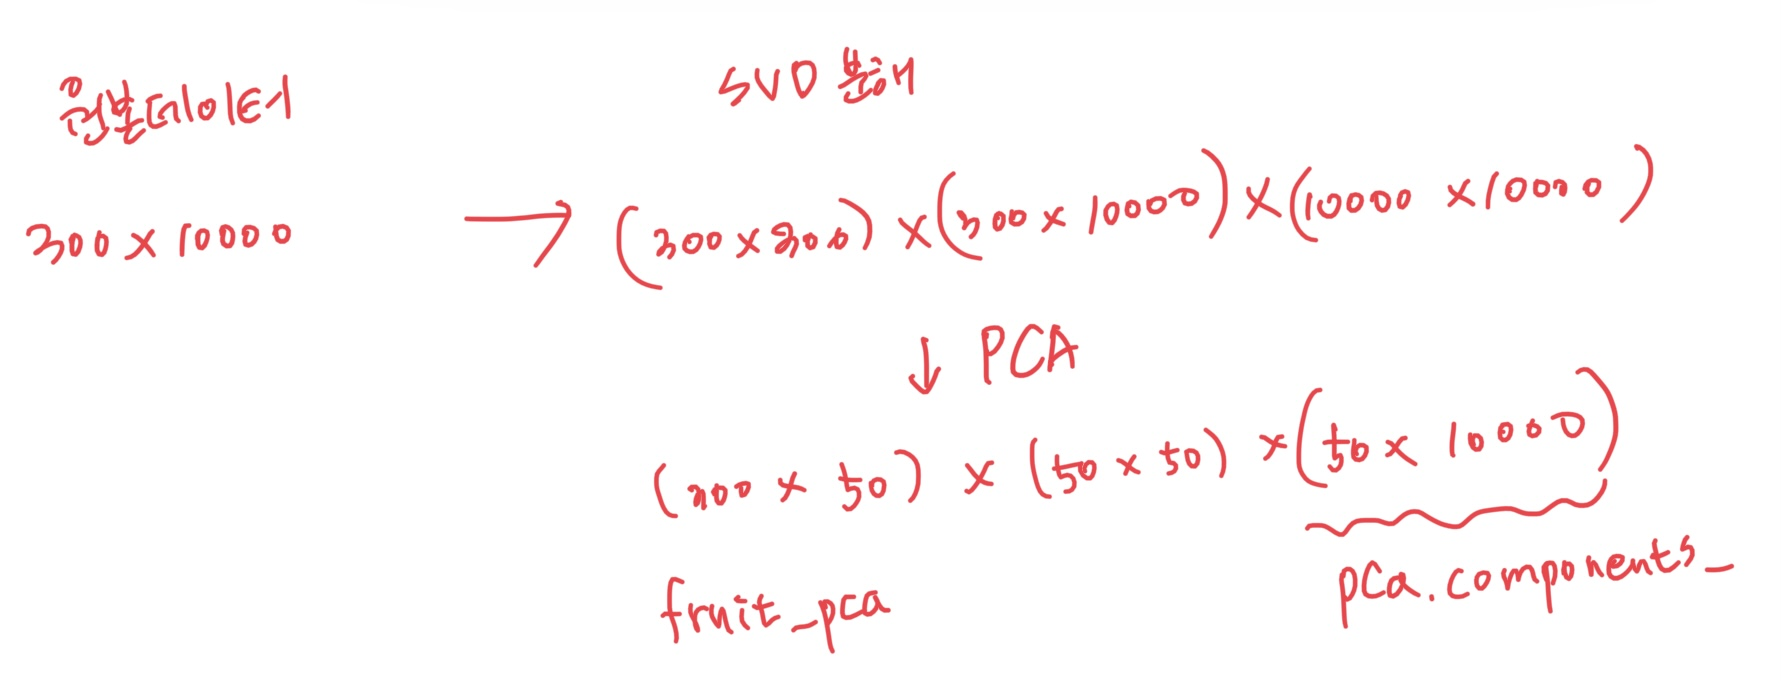

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n 개까지만 그립니다
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
                axs[i, j].axis('off')
    plt.show()          

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

원본데이터재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

설명된분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

로지스틱회귀와함께사용

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

원하는주성분갯수찾기

In [ ]:
pca = PCA(n_components=0.5)  # 50%
pca.fit(fruits_2d)
print(pca.n_components_)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

K-means 클러스터링

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()